In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
!gunzip -c ./clean-loan-data.csv.gz > ./clean-loan-data.csv

In [8]:
start_df = pd.read_csv('./clean-loan-data.csv', low_memory=False)

In [9]:
df = start_df.copy(deep=True)
df.head()

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,NaN,Sep,2013.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,NaN,Jan,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [4]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


## Missing Data


In [5]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 59 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,454312,51.2
next_pymnt_year,252971,28.5
next_pymnt_month,252971,28.5
total_rev_hi_lim,70276,7.9
tot_cur_bal,70276,7.9
tot_coll_amt,70276,7.9
emp_title,51462,5.8
last_pymnt_month,17659,2.0
last_pymnt_year,17659,2.0
revol_util,502,0.1


## Exporative Analysis

## Is Balanced?

0 = No Default<br />
1 = Default


In [6]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    886160
1      1219
Name: TARGET, dtype: int64

## Data Types

Text(0, 0.5, 'Data type')

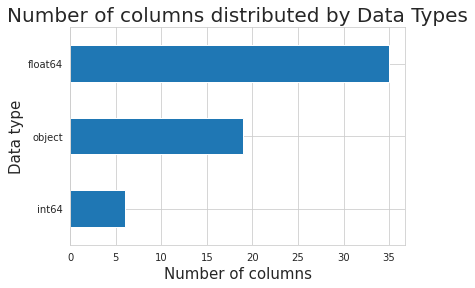

In [7]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)


In [8]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                          7
sub_grade                     35
emp_title                 299271
home_ownership                 6
verification_status            3
issue_month                   12
loan_status                   10
pymnt_plan                     2
url                       887379
purpose                       14
title                      63144
zip_code                     935
addr_state                    51
earliest_cr_line_month        12
initial_list_status            2
last_pymnt_month              12
next_pymnt_month              12
last_credit_pull_month        12
application_type               2
dtype: int64

## Number of loans distributed by Employment Years


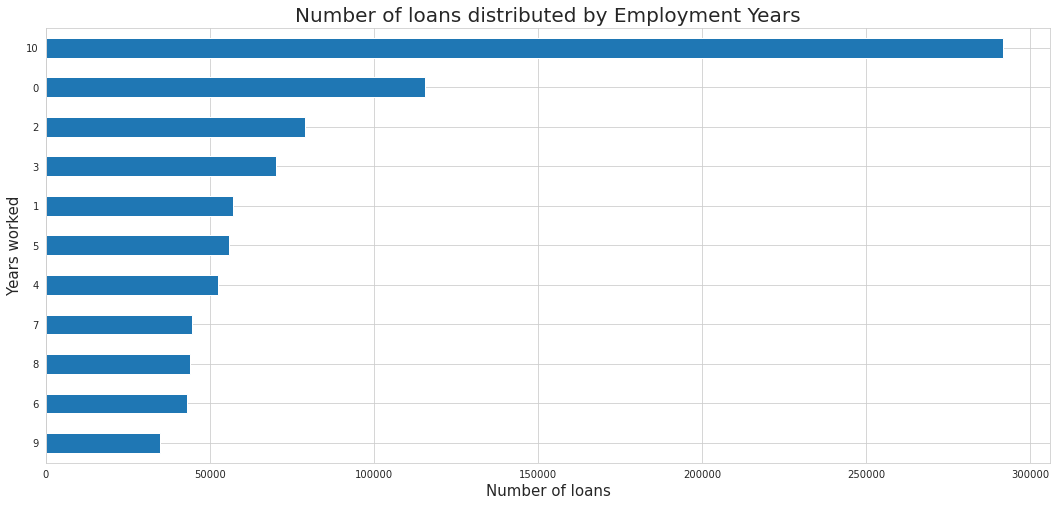

In [9]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


### Payment Plans

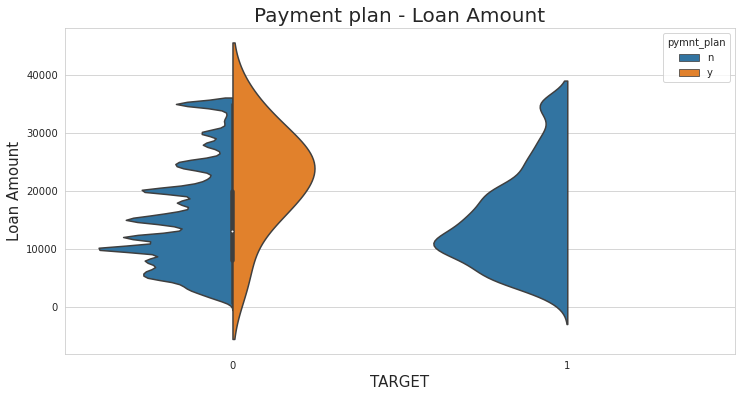

In [10]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);




In [11]:
# Remove Data with more than 70% missing data

temp = [i for i in df.count()<len(df) *0.30]
df.drop(df.columns[temp],axis=1,inplace=True)

In [12]:
corr = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 inq_last_6mths           0.006042
term                     0.009178
total_rec_int            0.010490
last_credit_pull_year    0.011545
total_rec_late_fee       0.011758
out_prncp                0.013938
out_prncp_inv            0.013944
int_rate                 0.024485
TARGET                   1.000000
policy_code                   NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 last_pymnt_amnt    -0.013132
total_rec_prncp    -0.012085
last_pymnt_year    -0.011478
id_pk              -0.010041
member_id          -0.009836
total_pymnt        -0.007590
total_pymnt_inv    -0.007448
tot_cur_bal        -0.007036
annual_inc         -0.004743
total_rev_hi_lim   -0.004729
Name: TARGET, dtype: float64


### Distribution over Interest

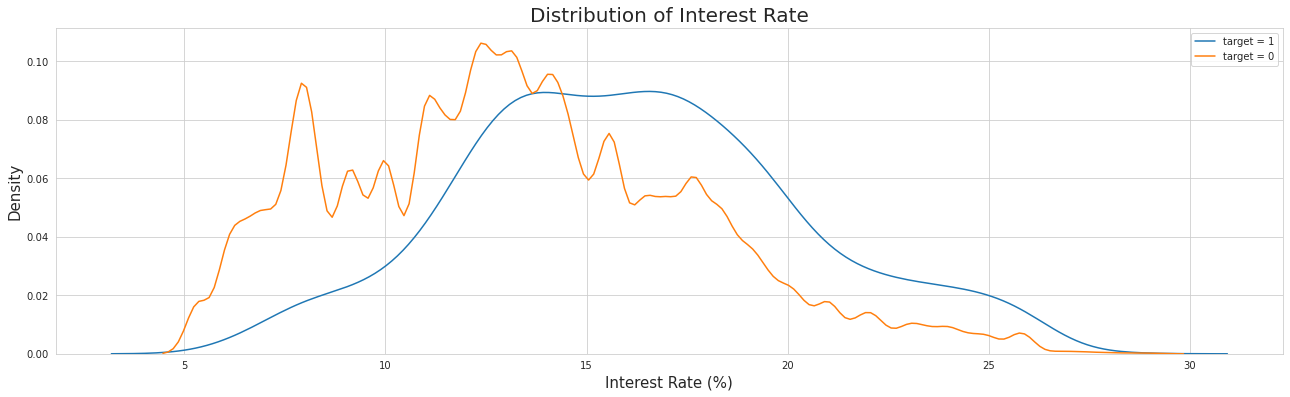

In [13]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend()
plt.title('Distribution of Interest Rate',fontsize=20);


### Term


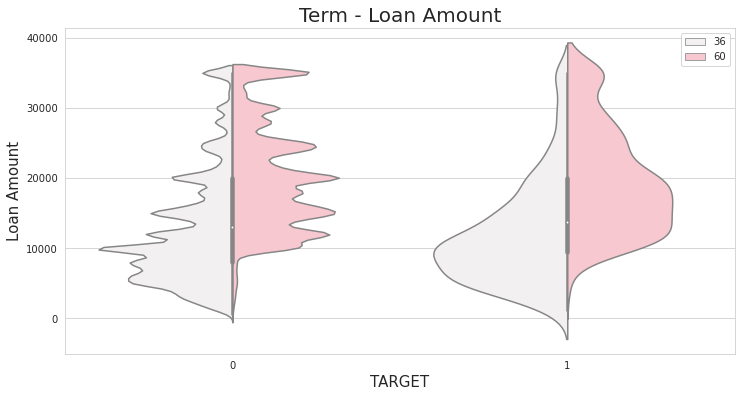

In [14]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);

### Application Type


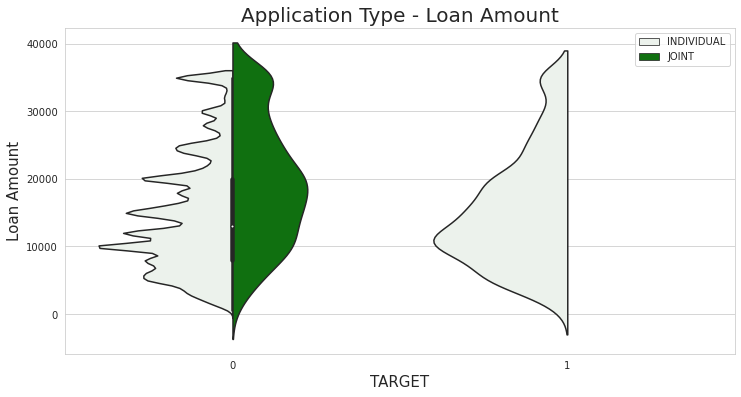

In [15]:


fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);



In [16]:
print("Number of joint loans significant?")

df['application_type'].value_counts()

Number of joint loans significant?


INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

### Loan Grade

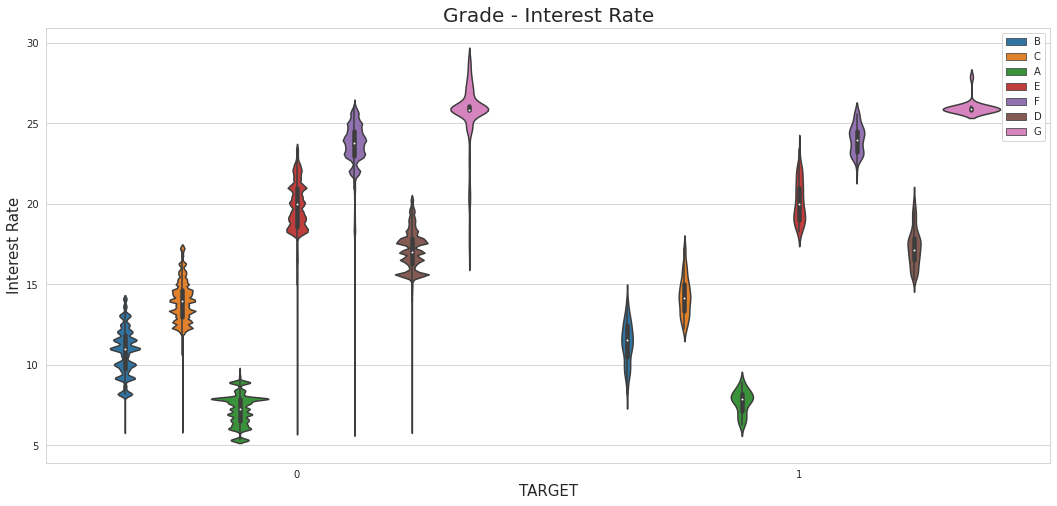

In [17]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Interest Rate", fontsize=15);



### Correlation of Income to amount taken?

In [18]:
df.corr()['annual_inc'].sort_values().tail(10)

out_prncp_inv       0.211254
total_rev_hi_lim    0.268860
revol_bal           0.295784
installment         0.326182
funded_amnt_inv     0.331420
funded_amnt         0.332466
loan_amnt           0.332698
tot_cur_bal         0.418332
annual_inc          1.000000
policy_code              NaN
Name: annual_inc, dtype: float64

### State

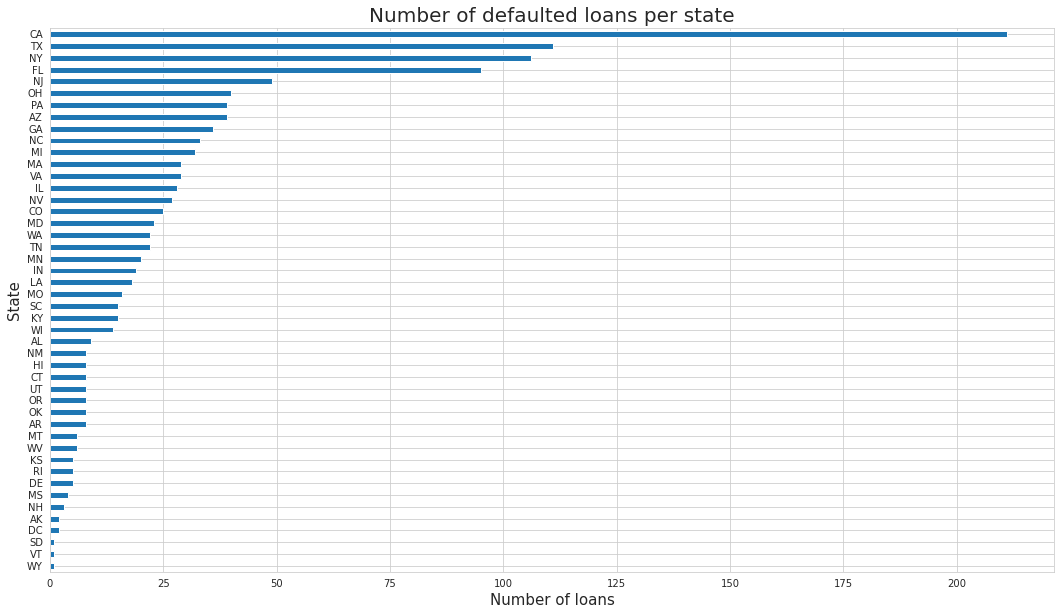

In [19]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

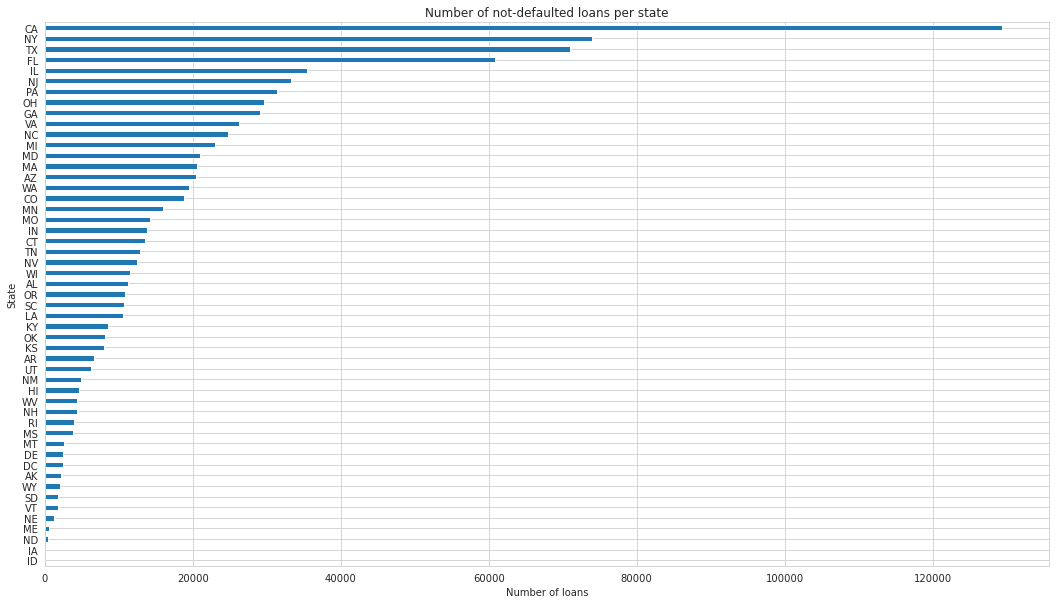

In [20]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');



## Cleanup

In [21]:
df['emp_title'].value_counts().head()

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: emp_title, dtype: int64

In [22]:
df.drop(['id_pk', 'member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [23]:
df.shape

(887379, 54)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  int64  
 4   int_rate                    887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_length                  887379 non-null  int64  
 9   home_ownership              887379 non-null  object 
 10  annual_inc                  887375 non-null  float64
 11  verification_status         887379 non-null  object 
 12  issue_month                 887379 non-null  object 
 13  issue_year    

## Preprocess

### Date Columns

In [25]:
# df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))
# df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
# df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
# df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
# df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))



### Categorical Features

In [26]:
from sklearn import preprocessing

In [27]:
count = 0

for col in df:
    if df[col].dtype == 'object' or col == 'term':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [28]:


df = pd.get_dummies(df)
print(df.shape)



(887379, 228)


In [29]:


df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())


df.dropna(inplace=True)




In [30]:


df.count().sort_values().head(3)



loan_amnt        610438
addr_state_KS    610438
addr_state_KY    610438
dtype: int64

In [31]:
df['TARGET'].value_counts()

0    609247
1      1191
Name: TARGET, dtype: int64

## Modeling


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.15,random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(X_train, y_train)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

#log_reg.fit(x_train_r, y_train_r)


In [40]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:



NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.model_selection import cross_validate


sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(df.drop('TARGET',axis=1), df['TARGET'])

cross_validate(log_reg, x_train_r, y_train_r, cv=3, scoring=('accuracy', 'recall'))

### Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

In [ ]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)